# **Brain Tumour Detection and Classification**
In this project, I've developed a Convolutional Neural Network (CNN) model trained to classify brain tumor images into four categories: glioma tumor, meningioma tumor, pituitary tumor, and no tumor. With an accuracy of 92%, the model demonstrates remarkable proficiency in distinguishing between these classes.


# 1. Importing the neccessary libraries

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D
import cv2
import os
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading the dataset

In [28]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 256
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 127.90it/s]


In [29]:
print("Shape of training data: ", (X_train).shape)

Shape of training data:  (3264, 256, 256, 3)


# 3. Data Visualization

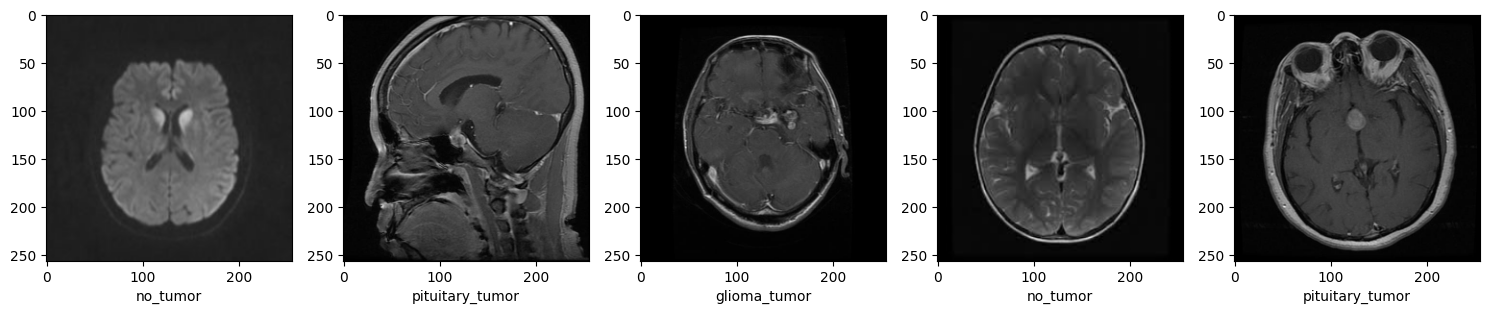

In [30]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=5, replace=False) 
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

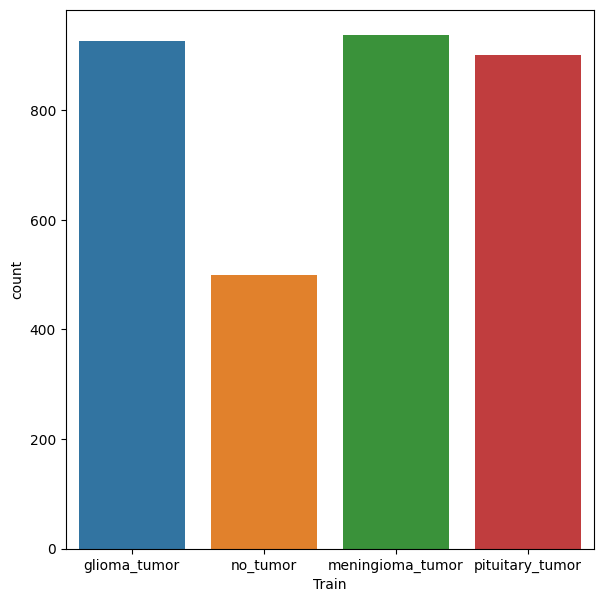

In [34]:
plt.figure(figsize = (15,7));
list = ['Train']
for i, j in enumerate([y_train]):
    plt.subplot(1,2,i+1)
    sns.countplot(x=j)
    plt.xlabel(list[i])

# 4. Data Augmentation
(ensures better accuracy)

In [35]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False, 
    fill_mode='nearest')

datagen.fit(X_train)

In [36]:
y_train = np.array(pd.get_dummies(y_train))

# 5. Splitting the dataset into Train, Test and Validation samples

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_test.shape, y_valid.shape

((2140, 256, 256, 3), (238, 256, 256, 3), (265, 4), (238, 4))

# 6. Normalization

In [39]:
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

# 7. Convulational Neural Network

In [47]:

model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256, 256, 3) ),
          
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 127, 127, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,881,732 (7.18 MB)

 Trainable params: 1,881,732 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, verbose=1, batch_size=32)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.4424 - loss: 1.2397 - val_accuracy: 0.5701 - val_loss: 0.9673
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 59s 969ms/step - accuracy: 0.6302 - loss: 0.8776 - val_accuracy: 0.5981 - val_loss: 0.8401
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 996ms/step - accuracy: 0.7012 - loss: 0.6961 - val_accuracy: 0.6916 - val_loss: 0.7083
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 965ms/step - accuracy: 0.7875 - loss: 0.5527 - val_accuracy: 0.7383 - val_loss: 0.5997
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 956ms/step - accuracy: 0.8297 - loss: 0.4530 - val_accuracy: 0.7944 - val_loss: 0.6013
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 985ms/step - accuracy: 0.8573 - loss: 0.3455 - val_accuracy: 0.8224 - val_loss: 0.5055
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 974ms/step - accuracy: 0.8795 - loss: 0.3201 - val_accuracy: 0.8364 - val_loss: 0.5337
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 59s 966ms/step - accuracy: 0.9234 - loss: 0.2050 - val_accurac

# 8. Confusion Matrix

67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step


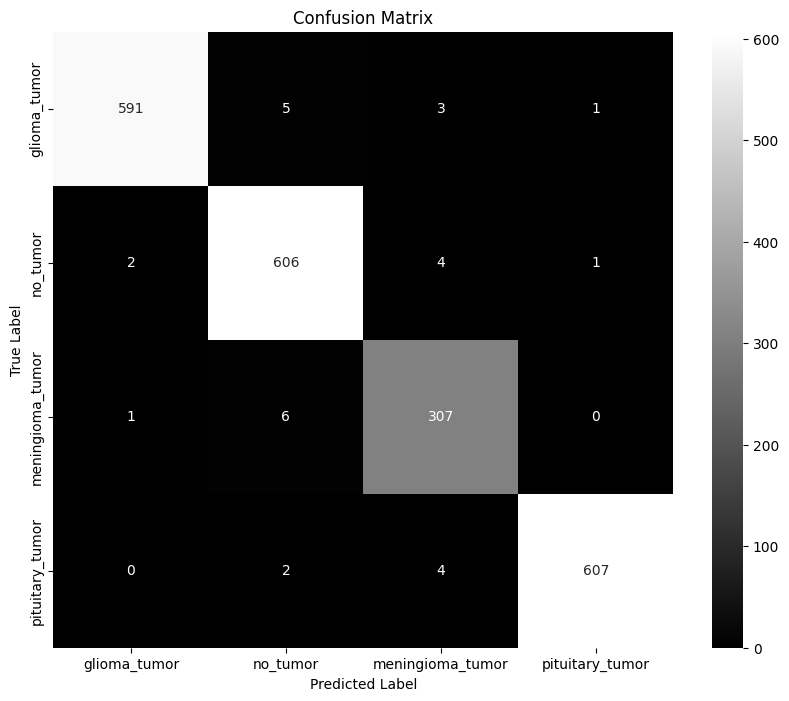

In [50]:
y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(model.predict(X_train), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='gray',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step


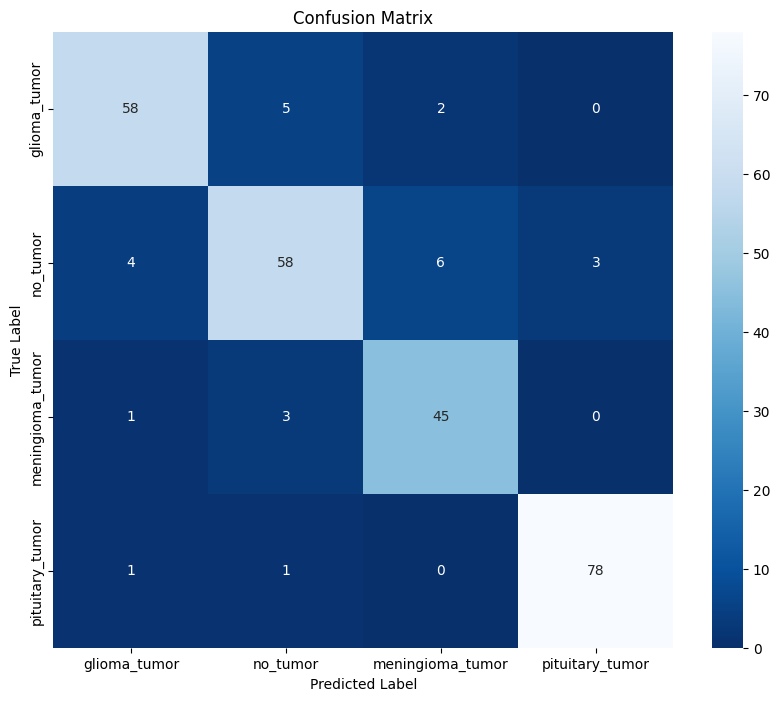

In [51]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        65
           1       0.87      0.82      0.84        71
           2       0.85      0.92      0.88        49
           3       0.96      0.97      0.97        80

    accuracy                           0.90       265
   macro avg       0.90      0.90      0.90       265
weighted avg       0.90      0.90      0.90       265



In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

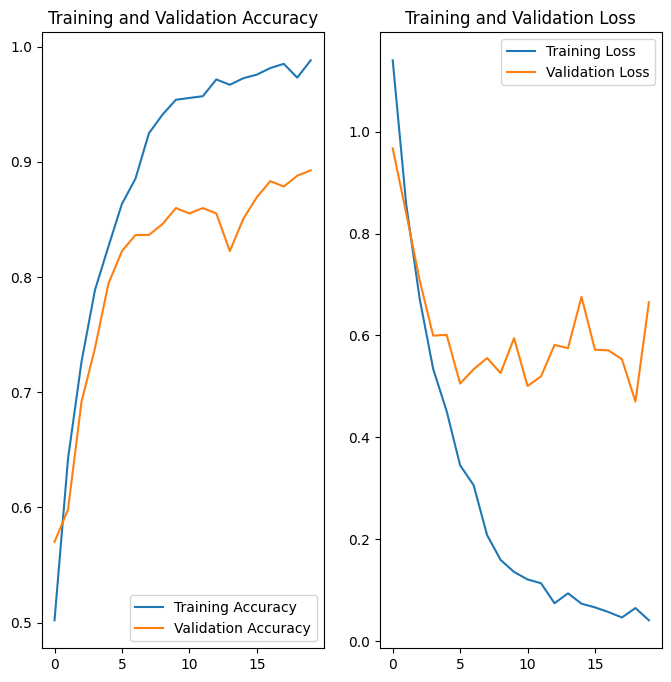

In [54]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction 

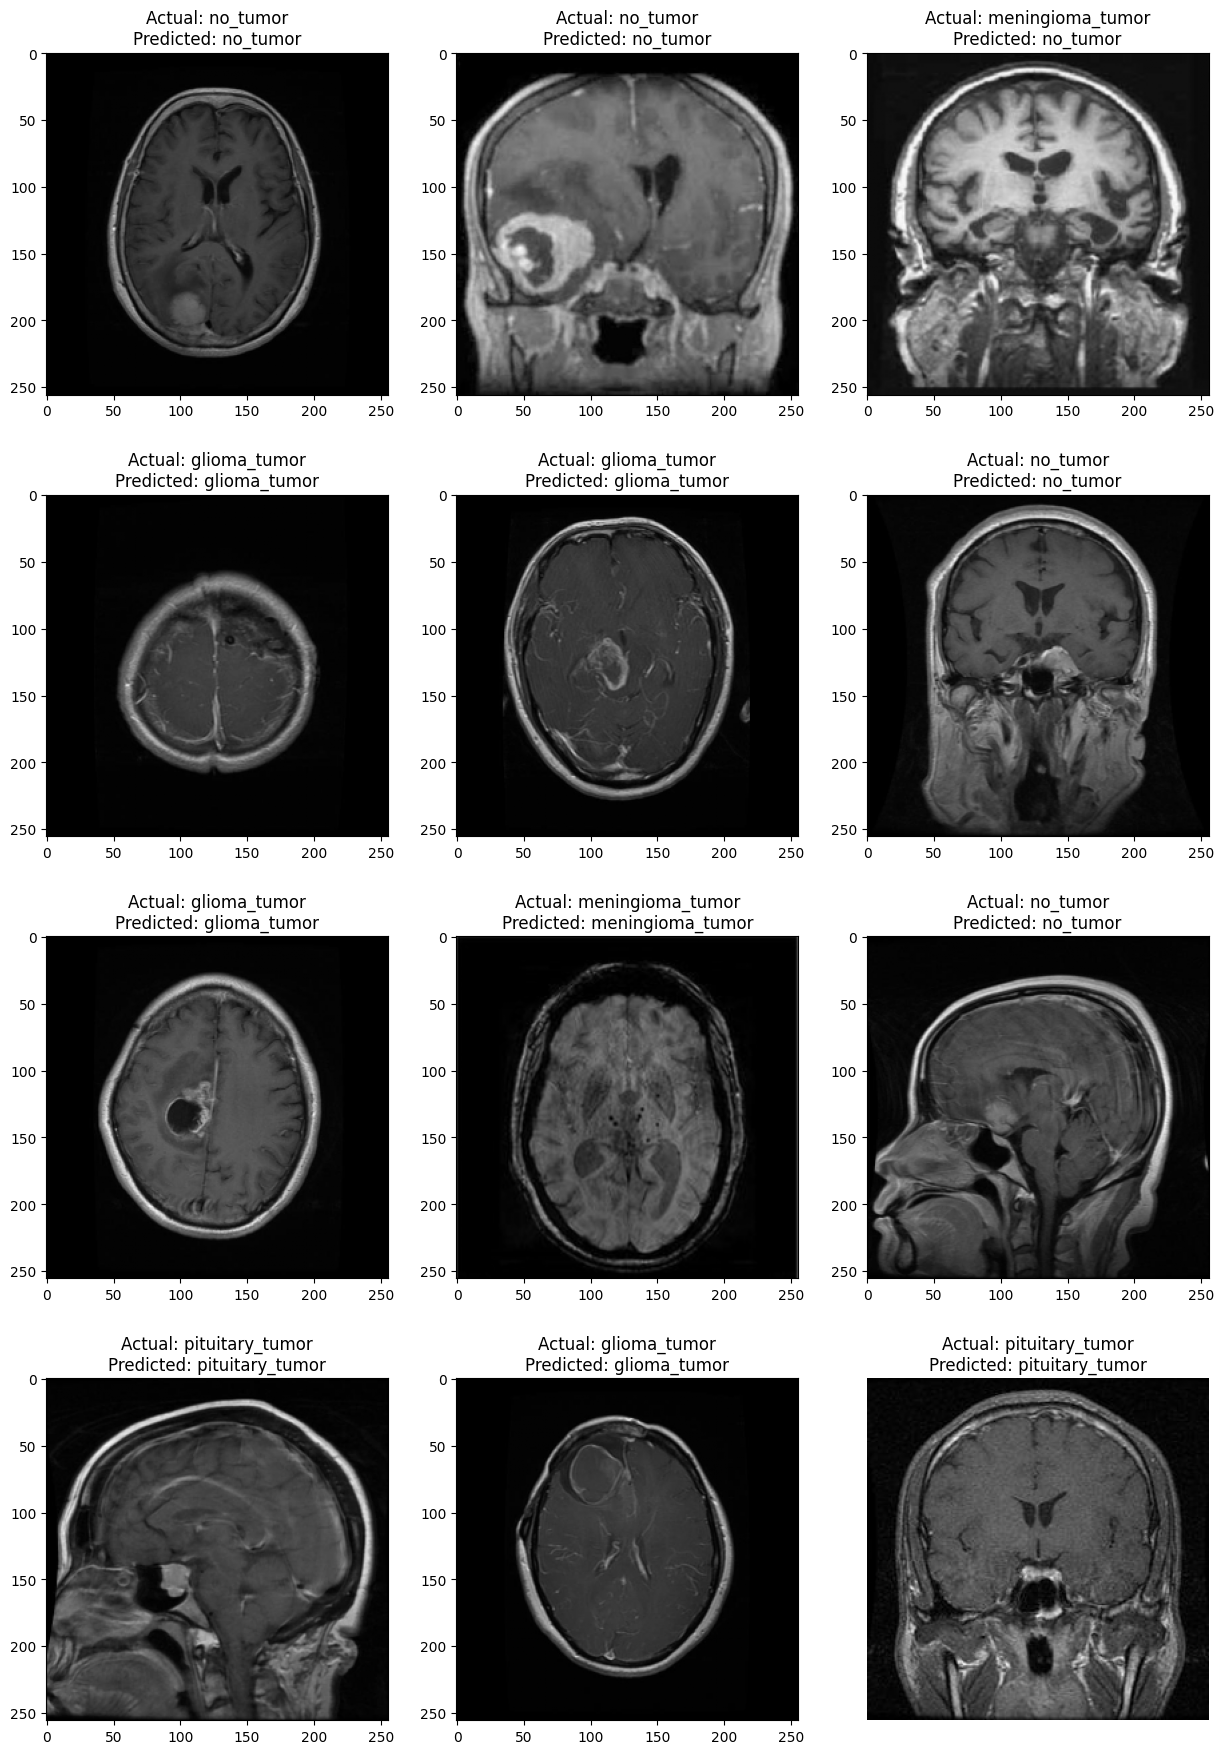

In [55]:
plt.figure(figsize=(15, 22))
def plot_images_with_confidence(images, actual, predicted):
    for i in range(12):
        plt.subplot(4, 3, i + 1)
        plt.imshow(images[i])  
        plt.title(f"Actual: {labels[actual[i]]}\nPredicted: {labels[predicted[i]]}")
    plt.axis("off")
plot_images_with_confidence(X_test, y_true_test, y_pred_test)